<a href="https://colab.research.google.com/github/malekslokom/Bayesian-Network/blob/main/LateSchool.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Book*: **Mastering Probabilistic
Graphical Models Using Python**








# Libraries

In [1]:
!pip install pgmpy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.9 MB 8.7 MB/s 


In [2]:
#Model
from pgmpy.factors.discrete.CPD import TabularCPD
from pgmpy.models import BayesianModel
from pgmpy.independencies import IndependenceAssertion
#Inferences
from pgmpy.inference import VariableElimination

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Bayesian models

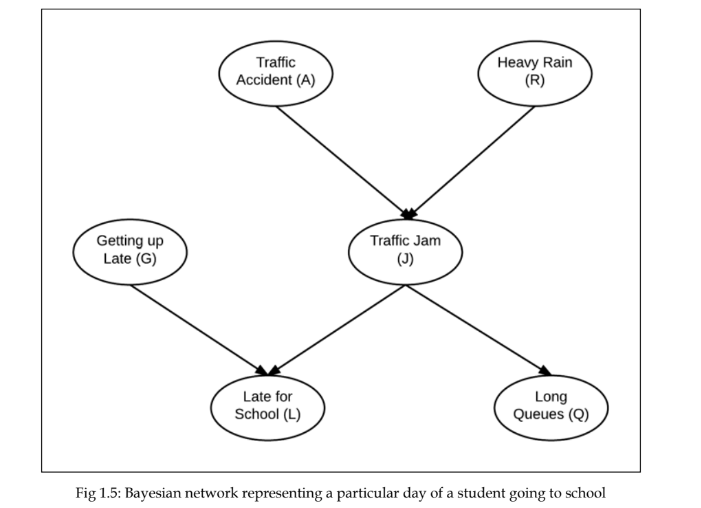

## Structure

In [3]:
model=BayesianModel()
model.add_nodes_from(['rain','traffic_jam'])
model.add_edge('rain','traffic_jam')
model.add_edge('accident','traffic_jam')
model.add_edge('traffic_jam','long_queues')
model.add_nodes_from(['getting_up_late','late_for_school'])
model.add_edges_from([('getting_up_late', 'late_for_school'),('traffic_jam', 'late_for_school')])

/usr/local/lib/python3.7/dist-packages/pgmpy/models/BayesianModel.py:10: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  FutureWarning,


## Representing CPDs

In [4]:
cpd_rain = TabularCPD('rain', 2, [[0.4], [0.6]])
print(cpd_rain)

+---------+-----+
| rain(0) | 0.4 |
+---------+-----+
| rain(1) | 0.6 |
+---------+-----+


In [5]:
cpd_accident = TabularCPD('accident', 2, [[0.2], [0.8]])
print(cpd_accident)

+-------------+-----+
| accident(0) | 0.2 |
+-------------+-----+
| accident(1) | 0.8 |
+-------------+-----+


In [6]:
cpd_traffic_jam = TabularCPD(
'traffic_jam', 2,
[[0.9, 0.6, 0.7, 0.1],
[0.1, 0.4, 0.3, 0.9]],
evidence=['rain', 'accident'],
evidence_card=[2, 2])
print(cpd_traffic_jam)

+----------------+-------------+-------------+-------------+-------------+
| rain           | rain(0)     | rain(0)     | rain(1)     | rain(1)     |
+----------------+-------------+-------------+-------------+-------------+
| accident       | accident(0) | accident(1) | accident(0) | accident(1) |
+----------------+-------------+-------------+-------------+-------------+
| traffic_jam(0) | 0.9         | 0.6         | 0.7         | 0.1         |
+----------------+-------------+-------------+-------------+-------------+
| traffic_jam(1) | 0.1         | 0.4         | 0.3         | 0.9         |
+----------------+-------------+-------------+-------------+-------------+


In [7]:
cpd_long_queues = TabularCPD('long_queues', 2,
[[0.9, 0.2],
[0.1, 0.8]],
evidence=['traffic_jam'],
evidence_card=[2])
print(cpd_long_queues)

+----------------+----------------+----------------+
| traffic_jam    | traffic_jam(0) | traffic_jam(1) |
+----------------+----------------+----------------+
| long_queues(0) | 0.9            | 0.2            |
+----------------+----------------+----------------+
| long_queues(1) | 0.1            | 0.8            |
+----------------+----------------+----------------+


In [8]:
cpd_getting_up_late = TabularCPD('getting_up_late', 2,
[[0.6], [0.4]])
print(cpd_getting_up_late)

+--------------------+-----+
| getting_up_late(0) | 0.6 |
+--------------------+-----+
| getting_up_late(1) | 0.4 |
+--------------------+-----+


In [9]:
cpd_late_for_school = TabularCPD(
'late_for_school', 2,
[[0.9, 0.45, 0.8, 0.1],
[0.1, 0.55, 0.2, 0.9]],
evidence=['getting_up_late','traffic_jam'],
evidence_card=[2, 2])
print(cpd_late_for_school)

+--------------------+-----+--------------------+
| getting_up_late    | ... | getting_up_late(1) |
+--------------------+-----+--------------------+
| traffic_jam        | ... | traffic_jam(1)     |
+--------------------+-----+--------------------+
| late_for_school(0) | ... | 0.1                |
+--------------------+-----+--------------------+
| late_for_school(1) | ... | 0.9                |
+--------------------+-----+--------------------+


In [10]:
model.add_cpds(cpd_rain, cpd_accident, cpd_traffic_jam,cpd_long_queues,cpd_getting_up_late,cpd_late_for_school)

In [11]:
model.nodes()

NodeView(('rain', 'traffic_jam', 'accident', 'long_queues', 'getting_up_late', 'late_for_school'))

In [12]:
model.edges()

OutEdgeView([('rain', 'traffic_jam'), ('traffic_jam', 'long_queues'), ('traffic_jam', 'late_for_school'), ('accident', 'traffic_jam'), ('getting_up_late', 'late_for_school')])

In [13]:
model.get_cpds()

[<TabularCPD representing P(rain:2) at 0x7fd8a4b7bf90>,
 <TabularCPD representing P(accident:2) at 0x7fd7c42929d0>,
 <TabularCPD representing P(traffic_jam:2 | rain:2, accident:2) at 0x7fd7c42aaa10>,
 <TabularCPD representing P(long_queues:2 | traffic_jam:2) at 0x7fd7c42b4310>,
 <TabularCPD representing P(getting_up_late:2) at 0x7fd7c42b4b50>,
 <TabularCPD representing P(late_for_school:2 | getting_up_late:2, traffic_jam:2) at 0x7fd8a692e4d0>]

Checks whether the
model and all the associated CPDs are consistent:

In [14]:
model.check_model()

True

### Remove cpd

In [15]:
# model.remove_cpds('late_for_school')

## Find active trail nodes


In [16]:

model.active_trail_nodes(['accident', 'rain'])

{'accident': {'accident', 'late_for_school', 'long_queues', 'traffic_jam'},
 'rain': {'late_for_school', 'long_queues', 'rain', 'traffic_jam'}}

In [17]:
model.active_trail_nodes('getting_up_late', 'rain')

{'getting_up_late': {'getting_up_late', 'late_for_school'}}

In [18]:
infer = VariableElimination(model)


First, let's compute the probability of having a traffic jam P(J). P(J) can be computed
by summing all the cases in the joint probability distribution, where J = True and J =
False, and then renormalize the distribution to sum it to 1. We get P(J = True) = 0.416
and P(J = True) = 0.584.

In [19]:
prob_jam = infer.query(variables = ['traffic_jam'])
print(prob_jam)

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

+----------------+--------------------+
| traffic_jam    |   phi(traffic_jam) |
+================+====================+
| traffic_jam(0) |             0.3960 |
+----------------+--------------------+
| traffic_jam(1) |             0.6040 |
+----------------+--------------------+


To compute P(J|A = True), we have to eliminate all the cases where A = False, and
then we can follow the earlier procedure to get P(J|A = True). This results in P(J =
True|A = True) = 0.72 and P(J = False|A = True) = 0.28.

In [20]:
prob_jam_bad_accident = infer.query(
                                        variables = ['traffic_jam'], 
                                        evidence = {'accident':1})
print(prob_jam_bad_accident)

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

+----------------+--------------------+
| traffic_jam    |   phi(traffic_jam) |
+================+====================+
| traffic_jam(0) |             0.3000 |
+----------------+--------------------+
| traffic_jam(1) |             0.7000 |
+----------------+--------------------+


We have seen that the observation of the outcome of parents influence the
probability of the children. Is the inverse possible? Let's try to find the probability of
heavy rain if we know that there is a traffic accident. To do so, we have to eliminate
all the cases where J = False and then reduce the probability to get P(R|J = True). This
results in P(R = True|J = True) = 0.7115 and P(R = False|J = True) = 0.2885. This is
also intuitive. If we knew that there was a traffic jam, then the chances of heavy rain
would increase. This is known as evidential reasoning, where the observation of the
outcomes of the children or effect influences the probability of parents or causes.

In [21]:
prob_rain_jam_bad = infer.query(
                                        variables = ['rain'], 
                                        evidence = {'traffic_jam':1})
print(prob_rain_jam_bad)

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

+---------+-------------+
| rain    |   phi(rain) |
+=========+=============+
| rain(0) |      0.2252 |
+---------+-------------+
| rain(1) |      0.7748 |
+---------+-------------+


If we knew that there was a traffic
jam on a day when there was no heavy rain, would it affect the chances of a traffic
accident? To do so, we have to follow a similar procedure of eliminating all those
cases, except the ones where R = False and J = True. By doing so, we would get P(A
= True|J = True, R = False) = 0.6 and P(A = False|J = True, R = False) = 0.4. Now, the
probability of an accident increases, which is what we had expected. As we can
see that before the observation of the traffic jam, both the random variables, heavy
rain and traffic accident, were independent of each other, but with the observation
of their common children, they are now dependent on each other. This type of
reasoning is called as intercausal reasoning, where different causes with the same
effect influence each other.

In [22]:
prob_accident_Not_rain_jam_bad = infer.query(
                                        variables = ['accident'], 
                                        evidence = {'traffic_jam':1,'rain':0})
print(prob_accident_Not_rain_jam_bad)

0it [00:00, ?it/s]

0it [00:00, ?it/s]

+-------------+-----------------+
| accident    |   phi(accident) |
+=============+=================+
| accident(0) |          0.0588 |
+-------------+-----------------+
| accident(1) |          0.9412 |
+-------------+-----------------+


# Converting Bayesian models into Markov models

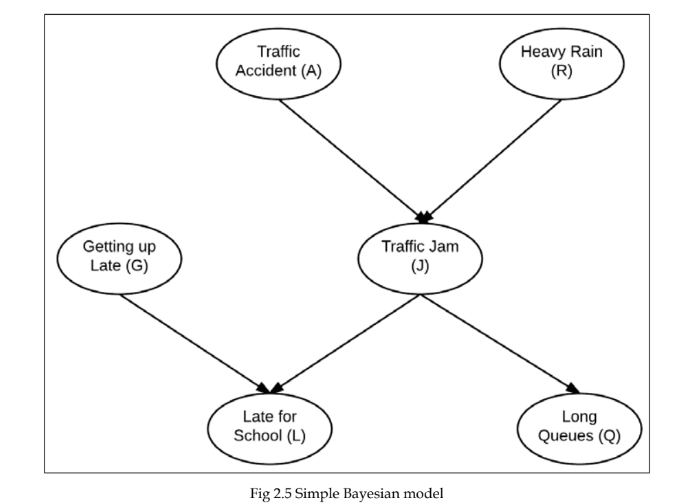

Let's try to convert this Bayesian model into a Markov model simply by replacing
directed edges with undirected ones and start by replacing the edges (A, J) and
(R, J) with undirected edges. However, this representation has a problem. The
Markov Blanket of node A would be J. Thus, this representation asserts that
A would be independent of all the nodes in the model expect J, given J or specifically
A ⊥ R | J . However, the Bayesian Network asserts the exact opposite of this . Thus, it requires an additional undirected edge between A and R.
Similarly, replacing directed edges with undirected edges and adding extra edges
where required, we get the network in the following figure:

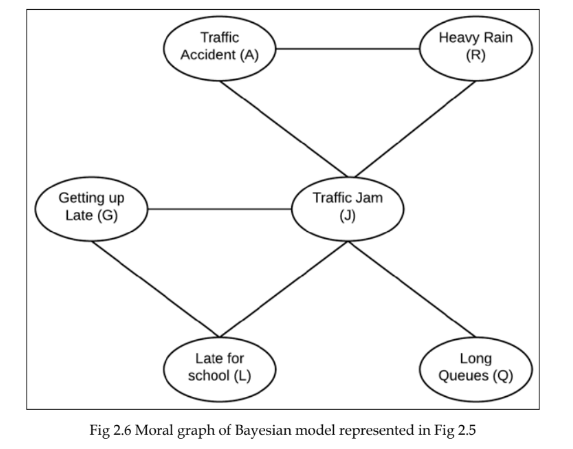

In [24]:
# Conversion from BayesianModel to MarkovModel is accomplished by
mm = model.to_markov_model()
mm.edges()

EdgeView([('rain', 'traffic_jam'), ('rain', 'accident'), ('traffic_jam', 'long_queues'), ('traffic_jam', 'late_for_school'), ('traffic_jam', 'accident'), ('traffic_jam', 'getting_up_late'), ('late_for_school', 'getting_up_late')])